<a href="https://colab.research.google.com/github/vashuverma/Stress-O-Meter/blob/main/Stress__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

LOAD THE DATASET

In [ ]:
dataset = pd.read_csv('Stress.csv')

DATA PREPROCESSING

In [ ]:
dataset.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [ ]:
dataset.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [ ]:
not_used_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
dataset1 = dataset.drop(not_used_cols,axis=1)
dataset1.sample(3)

,text,label
1030,I have some tainted memories with my dad and h...,1
1380,2. Socialize! we sure did not evolve as lone c...,0
41,"but I'm really, really afraid of public embarr...",0


In [ ]:
dataset1['label'].unique()

array([1, 0])

TEXT PREPROCESSING

In [ ]:
import nltk
import random
import re
from urllib.parse import urlparse
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def textPocess(sent):
    try:
        sent = re.sub('[][)(]',' ',sent)
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)
        sent = re.sub(r'\@\w+','',sent)
        sent = re.sub(re.compile("<.*?>"),'',sent)
        sent = re.sub("[^A-Za-z0-9]",' ',sent)
        sent = sent.lower()
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)
        tokens = word_tokenize(sent)
        for word in tokens:
            if word in stop_words:
                tokens.remove(word)
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)
        return sent
    except Exception as ex:
        print(sent,"\n")
        print("Error ",ex)
  

In [ ]:
dataset1['processed_text'] = dataset1['text'].apply(lambda text: textPocess(text))
dataset1.sample(3)

,text,label,processed_text
1029,"When I left my buddy's house, I went to an org...",0,left buddy house went an organic farm voluntee...
1153,How do I stop this without getting myself blac...,1,do stop without getting blacked balled dealing...
756,It's been about a year and a half since the ev...,0,s about year half since event set mental healt...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
MIN_DF = 1

In [ ]:
cv = CountVectorizer(min_df=MIN_DF)
cv_df = cv.fit_transform(dataset1['processed_text'])
cv_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=MIN_DF)
tf_df = tf.fit_transform(dataset1['processed_text'])
tf_df.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

MODELLING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv_df,dataset1['label'],stratify=dataset1['label'])
X_train.shape,y_test.shape

((2128, 10267), (710,))

LOGISTIC REGRESSION

In [ ]:
model_lr = LogisticRegression().fit(X_train,y_train)
model_lr.score(X_train,y_train),model_lr.score(X_test,y_test)

(0.9990601503759399, 0.7084507042253522)

NAIVE BAYES

In [ ]:
model_nb = MultinomialNB().fit(X_train,y_train)
model_nb.score(X_train,y_train),model_nb.score(X_test,y_test)

(0.9215225563909775, 0.7422535211267606)

RANDOM FOREST

In [ ]:
model_rf = RandomForestClassifier().fit(X_train,y_train)
model_rf.score(X_train,y_train),model_rf.score(X_test,y_test)

(0.9995300751879699, 0.7183098591549296)

SPLIT AGAIN

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(tf_df,dataset1['label'],stratify=dataset1['label'])
X_train1.shape,y_test1.shape

((2128, 10267), (710,))

LOGISTIC REGRESSION

In [ ]:
model_lr = LogisticRegression().fit(X_train1,y_train1)
model_lr.score(X_train1,y_train1),model_lr.score(X_test1,y_test1)

(0.9093045112781954, 0.7507042253521127)

NAIVE BAYES

In [ ]:
model_nb = MultinomialNB().fit(X_train1,y_train1)
model_nb.score(X_train1,y_train1),model_nb.score(X_test1,y_test1)

(0.8327067669172933, 0.676056338028169)

RANDOM FOREST

In [ ]:
model_rf = RandomForestClassifier().fit(X_train1,y_train1)
model_rf.score(X_train1,y_train1),model_rf.score(X_test1,y_test1)

(0.9985902255639098, 0.7169014084507043)

VALIDATION

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred = model_lr.predict(X_test1)
cm = confusion_matrix(y_pred,y_test1)
cm

array([[235,  74],
       [103, 298]])

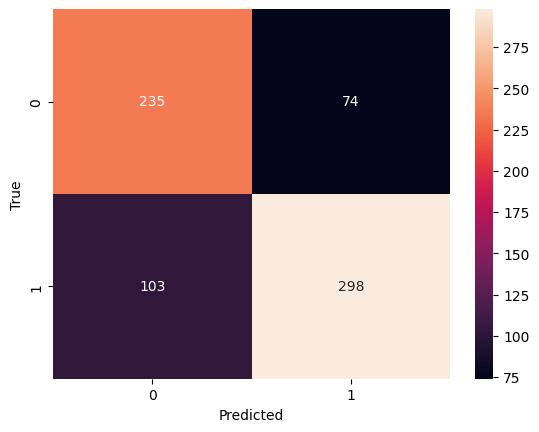

In [ ]:
sns.heatmap(cm,annot=True,fmt='')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

PREDICTION

In [ ]:
model = LogisticRegression().fit(tf_df,dataset1['label'])
model.score(tf_df,dataset1['label'])

0.8999295278365046

In [ ]:
def predictor(text):
    processed = textPocess(text)
    embedded_words = tf.transform([text])
    res = model.predict(embedded_words)
    if res[0] == 1:
        res = "You are in Stress"
        print("Stress Score : ",random.randrange(25,70))
    else:
        res = "you are not in Stress"
    return res
text = input("Speak : ")
print(predictor(text))

Speak : t’s a pleasure to meet you. I’m more than happy to speak with you. Please stop by my chamber tomorrow. Leila: It’s a pleasure to meet you, Doctor. Thank you so much for helping us. Doctor Rudra: Don’t mention it. Hopefully, I will be able to help you out in this matter.
you are not in Stress
